In [1]:
import numpy as nump;
import matplotlib.pyplot as pplot;
import pandas as p;
ds=p.read_csv('iris.data',header=None,names=['sepal_length','sepal_width','petal_length','petal_width','species']);
X=ds.iloc[:,:4].values;
Y=ds['species'].values;
ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
#Splitting Dataset into Training & Testing Sets
from sklearn.model_selection import train_test_split;
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2);
#Feature Scaling
from sklearn.preprocessing import StandardScaler;
sc=StandardScaler();
X_train=sc.fit_transform(X_train);
X_test=sc.transform(X_test);
#Training Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB();
classifier.fit(X_train,Y_train);
#Predicting Test Results
y_pred=classifier.predict(X_test);
print('Test Result:\n',y_pred);

Test Result:
 ['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


In [3]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix;
cmat=confusion_matrix(Y_test,y_pred);
print("Confusion Matrix:\n",cmat);

Confusion Matrix:
 [[15  0  0]
 [ 0  8  0]
 [ 0  1  6]]


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

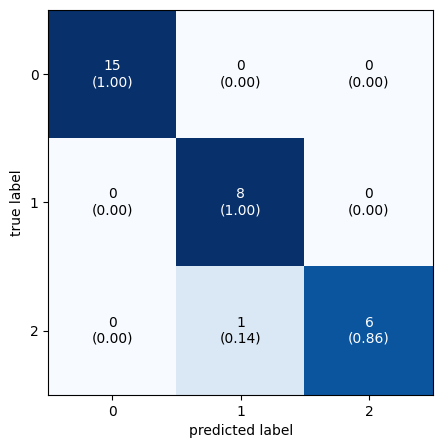

In [4]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cmat,figsize=[5,5],show_normed=True)

In [5]:
tn = cmat[0,0]
fp = cmat[0,1]+cmat[0,2]
fn = cmat[1,0]+cmat[2,0]
tp = cmat[1,1]+cmat[2,2]
print("1.TN:",tn)
print("2.FP:",fp)
print("3.FN:",fn)
print("4.TP:",tp)

1.TN: 15
2.FP: 0
3.FN: 0
4.TP: 14


In [9]:
# Compute performance metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy = accuracy_score(Y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')

In [11]:
print("Confusion Matrix:")
print(cmat)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
[[15  0  0]
 [ 0  8  0]
 [ 0  1  6]]
Accuracy: 0.9666666666666667
Error Rate: 0.033333333333333326
Precision: 0.9703703703703703
Recall: 0.9666666666666667
